# **Import Libraries & Data Loading**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re # if u want to learn regex [https://regex101.com/]
import string
import random # Random number generators - Library for generating random numbers, selecting random elements, shuffling sequences, etc.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option("display.max_columns", None)
# pd.set_option("display.max_row", None)

In [ ]:
def check_duplicates(dataframe):
    print("Duplicate Values (Top 10):")
    duplicate_values = dataframe[dataframe.duplicated()]
    print(f"Number of Duplicate Rows: {duplicate_values.shape[0]}")
    display(duplicate_values.head(10))

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def basic_data_info(dataframe):
    print("Data Preview:")
    print("---------------------------")
    display(dataframe.head())

    print("\nGeneral Info:")
    print("---------------------------")
    print(dataframe.info())

    print("\nDescriptive Statistics:")
    print("---------------------------")
    display(dataframe.describe().T)

### Text Processing **_[clean_text_1]_**

1. Mengubah semua karakter dalam teks menjadi **huruf kecil.**
2. Menghapus **'RT'**: Menggunakan pola \bRT\b untuk mencocokkan kata 'RT' sebagai kata tunggal.
3. Menghapus **link**: Menggunakan pola http\S+|www\S+ untuk menghapus link.
4. Menghapus pola **'[RE ...]'**: Menggunakan pola \[RE [^]]+\] untuk menghapus teks yang diawali dengan [RE dan diakhiri dengan ].
5. Menghapus pola **'@ ... ='**: Menggunakan pola @\S+= untuk menghapus teks yang diawali dengan @ dan diakhiri dengan =.
6. Menghapus **karakter non-ASCII (termasuk emoji)**: Menggunakan pola [^\x00-\x7F]+ untuk menghapus karakter non-ASCII.
7. Menghapus **spasi berlebih**: Menggunakan pola \s+ untuk mengganti spasi berlebih dengan satu spasi.
8. Menghapus **Tanda Baca**: Menggunakan translate string punctuation
9. Menghapus **Angka**: Menggunakan regex \b\d+\b untuk menghapus angka.
10. menghapus **single char**: Menggunakan regex "\b[a-zA-Z]\b" untuk menghapus karakter tunggal.
11. mengganti kata **slang** menjadi kata **formal**: mengganti kata slang dengan kata formal dalam teks menggunakan ekspresi reguler. Setiap pasangan kata slang dan formal dari slang_formal_pairs akan diaplikasikan ke teks.

### Text Processing **_[clean_text_2]_**

1. Menggunakan **clean_text_1** ditambahkan dengan ***penghapusan untuk hastag nya***

### Text Processing **_[clean_text_3]_**

1. Menggunakan clean_text_2 ditambahkan dengan stop_word, lemmatization, Stemming (NLTK, nlp-id, Sastrawi)

### Text Processing **_[clean_text_4]_**

1. Menggunakan **text awal**, namun untuk **processing tex**t nya akan dibantu oleh library **tweet-preprocessor** untuk processing text nya

# **Load Data**

In [ ]:
mainPath = "/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Pengerjaan Satria Data"
dataPath = os.path.join(mainPath, "Dataset-BDC-SatriaData-2024")
corpusPath = os.path.join(mainPath, "Corpus by TimTam")
cleanDataPath = os.path.join(mainPath, "Clean Dataset")

In [ ]:
train = pd.read_csv(dataPath + "/dataset_penyisihan_bdc_2024.csv", sep=";")
test = pd.read_csv(dataPath + "/dataset_unlabeled_penyisihan_bdc_2024.csv", sep=";")
submissions = pd.read_csv(dataPath + "/template_jawaban_penyisihan_bdc_2024.csv", sep=";")
lexicon_corpus = pd.read_excel(corpusPath + "/colloquial-indonesian-lexicon.xlsx", sheet_name="Clean-Colloquial-Lexicon")
stopword_corpus = pd.read_excel(corpusPath + "/Stopword byTimTam.xlsx")

# **Simple Explore the Data**

In [ ]:
train = pd.read_csv(cleanDataPath + "/Processing-Data-clean-text-6.csv")

In [ ]:
train["label"].value_counts()

label
Politik                    2972
Sosial Budaya               425
Ideologi                    343
Pertahanan dan Keamanan     331
Ekonomi                     310
Sumber Daya Alam            157
Demografi                    61
Geografi                     20
Name: count, dtype: int64

In [ ]:
train[train["label"] == "Demografi"]

,text,label,clean_text_1,clean_text_2,clean_text_3,clean_text_4,clean_text_5
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,memang benar sih pendukung ada yang goblok be...,memang benar sih pendukung ada yang goblok beg...,dukung goblok dukung ridwan kamil skema balik ...,"emng bener sih, pendukung ada yg goblok, begit...",dukung goblok dukung ridwan kamil skema mayori...
64,"RT Konsisten, selama ini bersuara melawan radi...",Demografi,konsisten selama ini bersuara melawan radikali...,konsisten selama ini bersuara melawan radikali...,konsisten suara lawan radikalisme intoleransi ...,"rt konsisten, selama ini bersuara melawan radi...",konsisten suara lawan radikalisme toleransi pi...
349,RT GANJAR-MAHFUD MD: PROGRAM KULIAH GRATIS BAG...,Demografi,ganjarmahfud md program kuliah gratis bagi ana...,ganjarmahfud md program kuliah gratis bagi ana...,ganjarmahfud md program kuliah gratis anak ten...,rt ganjar-mahfud md: program kuliah gratis bag...,ganjar mahfud program kuliah gratis anak tenta...
483,"Ã°ÂŸÂšÂµ Jumat, agenda Ganjar Pranowo-Mahfud M...",Demografi,jumat agenda ganjar pranowomahfud md kampanye ...,jumat agenda ganjar pranowomahfud md kampanye ...,jumat agenda ganjar pranowomahfud md kampanye ...,"jumat, agenda ganjar pranowo-mahfud md kampany...",jumat agenda ganjar pranowo mahfud kampanye ja...
575,RT *Ternyata Anies lebih gila.. share ke semua...,Demografi,ternyata anies lebih gila share ke semua group...,ternyata anies lebih gila share ke semua group...,anies gila share group bangga anak bangsa indo...,rt *ternyata anies lebih gila.. share ke semua...,anies gila grup bangga anak bangsa indonesia p...
...,...,...,...,...,...,...,...
4093,RT Terus terang saya belum tahu ini. Tapi tern...,Demografi,terus terang saya belum tahu ini tapi ternyata...,terus terang saya belum tahu ini tapi ternyata...,terang danau buat jakarta selatan depok dampin...,rt terus terang saya belum tahu ini. tapi tern...,terang danau jakarta selatan depok damping air...
4199,"Kan, sekali lagi maap2 ini, maap2, pendukung P...",Demografi,kan sekali lagi maap2 ini maap2 pendukung prab...,kan sekali lagi maap2 ini maap2 pendukung prab...,maap2 maap2 dukung prabowo golong didik lihat ...,"kan, sekali lagi maap2 ini, maap2, pendukung p...",maaf maaf dukung prabowo golong didik lihat il...
4294,RT Setelah dari Sumatra barat Pak Anies langsu...,Demografi,setelah dari sumatra barat pak anies langsung ...,setelah dari sumatra barat pak anies langsung ...,sumatra barat anies langsung malam ciamis jawa...,rt setelah dari sumatra barat pak anies langsu...,sumatera barat anies langsung malam ciamis jaw...
4351,"RT Anak kuliahan, generasi muda, Gen-Z dan mil...",Demografi,anak kuliahan generasi muda genz dan milenial ...,anak kuliahan generasi muda genz dan milenial ...,anak kuliah generasi muda genz milenial pilih ...,"rt anak kuliahan, generasi muda, gen-z dan mil...",anak kuliah generasi muda generasi milenial pi...


In [ ]:
# for i in train [train["label"] == "Politik"]["clean_text_3"]:
#   print(i)

## **Wordcloud - For Every Label**

In [ ]:
# Memisahkan teks berdasarkan label
texts_by_label = train.groupby('label')['clean_text_3'].apply(lambda x: ' '.join(x)).to_dict()

# Custom tokenizer to split words
def simple_tokenizer(text):
    return text.split()

In [ ]:
texts_by_label['Demografi']

'dukung goblok dukung ridwan kamil skema balik mayoritas didik tengah didik rendah pilih konsisten suara lawan radikalisme intoleransi pilih prabowo omon omon anggap tokoh toleran masyarakat lintas etnis kalbar kompak dukung ganjar pontianak ribu masyarakat lintas etnis sekalimantan barat kumpul hotel golden tulip pontianak rabu wakil tokoh dayak tionghoa papua jawa mang batak madura selamat kota khatulistiwa ganjar bangga tokoh adat etnis sambut ganjar ketua dewan bina dewan adat daerah dad kalbar ketua tim menang daerah tpd ganjar mahfud kalbar lazarus masyarakat kalbar antusias sambut ganjar hadir tokoh ketua organisasi etnis bukti sepakat dukung ganjar mahfud tokoh adat kumpul wakil organisasi kelompok etnis adat kalimantan barat dukung ganjar menang kalbar lazarus sambut ria kompak ribu masyarakat adat kalbar ganjar presiden ganjar mahfud menang menang menang teriak kompak tokoh adat dayak henusa masyarakat lintas etnis kalbar kompak dukung ganjar anggap tokoh toleran anggota dpr 

In [ ]:
texts_by_label['Geografi']

'malam ganjar salawatan istighosah bareng puluh ribu warga sarang senin pimpin gus ali gondrong lokasi lapang sapta rengga bandung kabupaten sarang suasana penuh suka cita ganjar warga sambut bersamasama golput pilih capres no ganjar pranowo mahfud md ganjar mahfud hebat guru ngaji juta tiktok bilang anies ken bangun kota jakarta provinsi 34ngakak kuliah gratis dampak anak tinggal kota pelosok makan siang gratis sulit terap dalam internet gratis anakanak suka main game mager aktivitasfisik owi orgnya erti bkl panen cuan ikn tanah prabowo adek prabowo bilang mah tanah negara wkwk pilih bangun wilayah perata wilayah cape gue dukung prabowo cuman alat doang mendingkepaslon13 lu gblok lu lihat pulau reklamasi jalan dipermasalahinanies sumber food estate gunung mas kalteng tanggung nya prabowo kemhan langsung jokowi bro tiati misleading trsorgorgpercaya bvpbbkfz5ibux5w7bgyzl34m marah2 anies pulau reklamasi usik eee pas bukti pengadilankalah teman komentar anies mah janji doang manis asli ca

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizer setup
vectorizer = CountVectorizer(tokenizer=simple_tokenizer, stop_words='english')

wordclouds = {}

# Membuat wordcloud untuk setiap label
for label, texts in texts_by_label.items():
    X = vectorizer.fit_transform([texts])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    wordclouds[label] = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
wordclouds

{'Demografi': <wordcloud.wordcloud.WordCloud at 0x79c8a4117a90>,
 'Ekonomi': <wordcloud.wordcloud.WordCloud at 0x79c89fb88d00>,
 'Geografi': <wordcloud.wordcloud.WordCloud at 0x79c8a7b340d0>,
 'Ideologi': <wordcloud.wordcloud.WordCloud at 0x79c89fc1c670>,
 'Pertahanan dan Keamanan': <wordcloud.wordcloud.WordCloud at 0x79c89fc1c6d0>,
 'Politik': <wordcloud.wordcloud.WordCloud at 0x79c89fc1c370>,
 'Sosial Budaya': <wordcloud.wordcloud.WordCloud at 0x79c89fc1dcc0>,
 'Sumber Daya Alam': <wordcloud.wordcloud.WordCloud at 0x79c89fc1d2d0>}

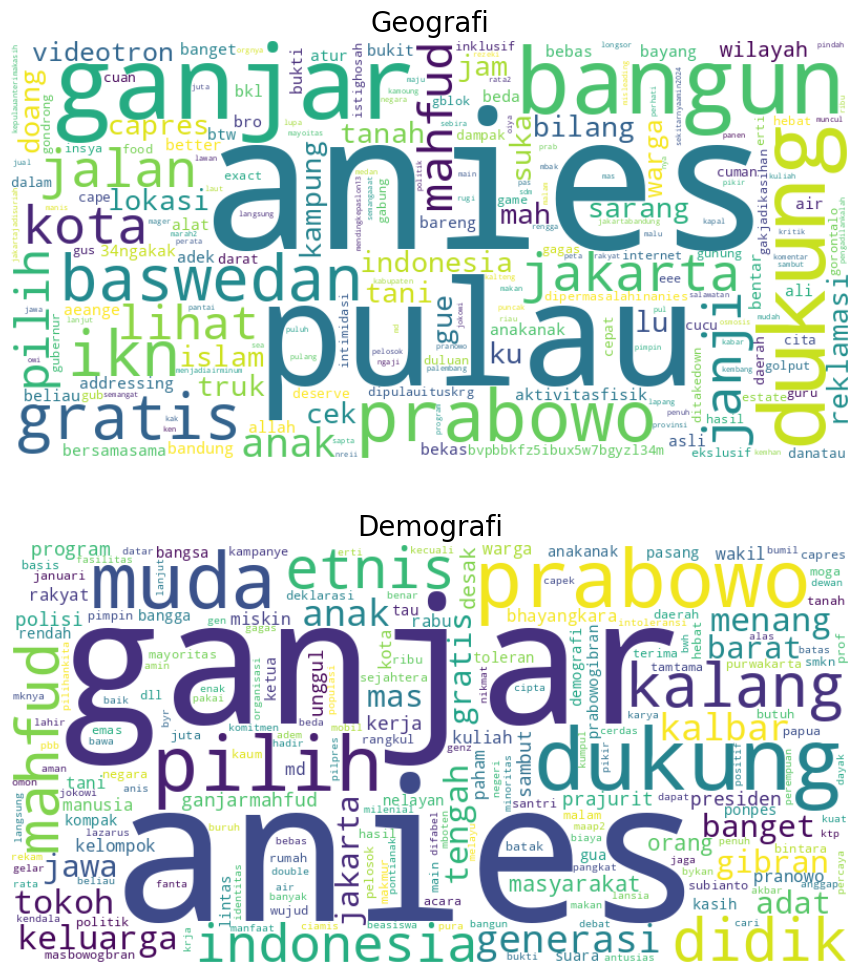

In [ ]:
# Ambil word cloud untuk 'Geografi' dan 'Demografi'
geografi_wordcloud = wordclouds['Geografi']
demografi_wordcloud = wordclouds['Demografi']

# Menampilkan word cloud
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Geografi
axes[0].imshow(geografi_wordcloud, interpolation='bilinear')
axes[0].set_title('Geografi', fontsize=20)
axes[0].axis('off')

# Demografi
axes[1].imshow(demografi_wordcloud, interpolation='bilinear')
axes[1].set_title('Demografi', fontsize=20)
axes[1].axis('off')

plt.show()

## **Count of Words**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [ ]:
def get_word_frequencies(label):
    texts = texts_by_label[label]
    X = vectorizer.fit_transform([texts])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    return word_freq

# Hitung frekuensi kata untuk 'Geografi' dan 'Demografi'
geografi_word_freq = get_word_frequencies('Geografi')
demografi_word_freq = get_word_frequencies('Demografi')

In [ ]:
# Convert to DataFrame for easier viewing
geografi_word_freq_df = pd.DataFrame(geografi_word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
demografi_word_freq_df = pd.DataFrame(demografi_word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Tampilkan 10 kata teratas
print("Top 10 words in 'Geografi':")
print(geografi_word_freq_df.head(10))
print("\nTop 10 words in 'Demografi':")
print(demografi_word_freq_df.head(10))

Top 10 words in 'Geografi':
        Word  Frequency
11     anies         13
172    pulau          7
64    ganjar          5
52    dukung          4
166  prabowo          4
16    bangun          4
69    gratis          3
161    pilih          3
91     janji          3
89     jalan          3

Top 10 words in 'Demografi':
        Word  Frequency
28     anies         41
176   ganjar         32
476  prabowo         17
154   dukung         17
461    pilih         16
390     muda         16
262   kalang         14
347   mahfud         13
141    didik         13
165    etnis         12


### Geografi

In [ ]:
# Zip kata dan frekuensi
geografi_word_freq_pairs = list(zip(geografi_word_freq_df["Word"], geografi_word_freq_df["Frequency"]))
print(geografi_word_freq_pairs)

[('anies', 13), ('pulau', 7), ('ganjar', 5), ('dukung', 4), ('prabowo', 4), ('bangun', 4), ('gratis', 3), ('pilih', 3), ('janji', 3), ('jalan', 3), ('kota', 3), ('jakarta', 3), ('baswedan', 3), ('lihat', 3), ('mahfud', 3), ('ikn', 3), ('videotron', 2), ('indonesia', 2), ('sarang', 2), ('tanah', 2), ('cek', 2), ('capres', 2), ('warga', 2), ('tani', 2), ('wilayah', 2), ('lu', 2), ('kampung', 2), ('ku', 2), ('bilang', 2), ('gue', 2), ('islam', 2), ('suka', 2), ('anak', 2), ('reklamasi', 2), ('lokasi', 2), ('doang', 2), ('truk', 2), ('mah', 2), ('jam', 2), ('pikir', 1), ('program', 1), ('pimpin', 1), ('pindah', 1), ('politik', 1), ('perhati', 1), ('prab', 1), ('pranowo', 1), ('peta', 1), ('owi', 1), ('perata', 1), ('ngaji', 1), ('mas', 1), ('mayoitas', 1), ('mbak', 1), ('md', 1), ('medan', 1), ('mendingkepaslon13', 1), ('menjadiairminum', 1), ('misleading', 1), ('mudah', 1), ('muncul', 1), ('negara', 1), ('nreii', 1), ('penuh', 1), ('nya', 1), ('oiya', 1), ('orgnya', 1), ('osmosis', 1), ('

In [ ]:
for word in geografi_word_freq_pairs:
  print(word)

('anies', 13)
('pulau', 7)
('ganjar', 5)
('dukung', 4)
('prabowo', 4)
('bangun', 4)
('gratis', 3)
('pilih', 3)
('janji', 3)
('jalan', 3)
('kota', 3)
('jakarta', 3)
('baswedan', 3)
('lihat', 3)
('mahfud', 3)
('ikn', 3)
('videotron', 2)
('indonesia', 2)
('sarang', 2)
('tanah', 2)
('cek', 2)
('capres', 2)
('warga', 2)
('tani', 2)
('wilayah', 2)
('lu', 2)
('kampung', 2)
('ku', 2)
('bilang', 2)
('gue', 2)
('islam', 2)
('suka', 2)
('anak', 2)
('reklamasi', 2)
('lokasi', 2)
('doang', 2)
('truk', 2)
('mah', 2)
('jam', 2)
('pikir', 1)
('program', 1)
('pimpin', 1)
('pindah', 1)
('politik', 1)
('perhati', 1)
('prab', 1)
('pranowo', 1)
('peta', 1)
('owi', 1)
('perata', 1)
('ngaji', 1)
('mas', 1)
('mayoitas', 1)
('mbak', 1)
('md', 1)
('medan', 1)
('mendingkepaslon13', 1)
('menjadiairminum', 1)
('misleading', 1)
('mudah', 1)
('muncul', 1)
('negara', 1)
('nreii', 1)
('penuh', 1)
('nya', 1)
('oiya', 1)
('orgnya', 1)
('osmosis', 1)
('pul', 1)
('palembang', 1)
('panen', 1)
('pantai', 1)
('pas', 1)
('pel

### Demografi

In [ ]:
# Zip kata dan frekuensi
demografi_word_freq_df_pairs = list(zip(demografi_word_freq_df["Word"], demografi_word_freq_df["Frequency"]))
print(demografi_word_freq_df_pairs)

[('anies', 41), ('ganjar', 32), ('prabowo', 17), ('dukung', 17), ('pilih', 16), ('muda', 16), ('kalang', 14), ('mahfud', 13), ('didik', 13), ('etnis', 12), ('indonesia', 12), ('generasi', 11), ('anak', 10), ('kalbar', 10), ('tokoh', 8), ('keluarga', 8), ('tengah', 8), ('menang', 8), ('orang', 7), ('barat', 7), ('banget', 7), ('gratis', 7), ('jakarta', 7), ('masyarakat', 7), ('gibran', 7), ('mas', 7), ('adat', 7), ('jawa', 7), ('ganjarmahfud', 6), ('polisi', 6), ('sambut', 6), ('program', 6), ('desak', 6), ('kerja', 6), ('unggul', 6), ('prajurit', 6), ('presiden', 6), ('bhayangkara', 5), ('miskin', 5), ('rabu', 5), ('tani', 5), ('manusia', 5), ('kuliah', 5), ('kelompok', 5), ('wakil', 5), ('warga', 5), ('kota', 5), ('rakyat', 5), ('md', 5), ('pranowo', 5), ('paham', 5), ('lintas', 4), ('pasang', 4), ('toleran', 4), ('demografi', 4), ('tau', 4), ('suara', 4), ('bangga', 4), ('gua', 4), ('ponpes', 4), ('kasih', 4), ('nelayan', 4), ('rendah', 4), ('anakanak', 4), ('prabowogibran', 4), ('ko

In [ ]:
for word in demografi_word_freq_df_pairs:
  print(word)

('anies', 41)
('ganjar', 32)
('prabowo', 17)
('dukung', 17)
('pilih', 16)
('muda', 16)
('kalang', 14)
('mahfud', 13)
('didik', 13)
('etnis', 12)
('indonesia', 12)
('generasi', 11)
('anak', 10)
('kalbar', 10)
('tokoh', 8)
('keluarga', 8)
('tengah', 8)
('menang', 8)
('orang', 7)
('barat', 7)
('banget', 7)
('gratis', 7)
('jakarta', 7)
('masyarakat', 7)
('gibran', 7)
('mas', 7)
('adat', 7)
('jawa', 7)
('ganjarmahfud', 6)
('polisi', 6)
('sambut', 6)
('program', 6)
('desak', 6)
('kerja', 6)
('unggul', 6)
('prajurit', 6)
('presiden', 6)
('bhayangkara', 5)
('miskin', 5)
('rabu', 5)
('tani', 5)
('manusia', 5)
('kuliah', 5)
('kelompok', 5)
('wakil', 5)
('warga', 5)
('kota', 5)
('rakyat', 5)
('md', 5)
('pranowo', 5)
('paham', 5)
('lintas', 4)
('pasang', 4)
('toleran', 4)
('demografi', 4)
('tau', 4)
('suara', 4)
('bangga', 4)
('gua', 4)
('ponpes', 4)
('kasih', 4)
('nelayan', 4)
('rendah', 4)
('anakanak', 4)
('prabowogibran', 4)
('kompak', 4)
('ketua', 4)
('bangsa', 4)
('pelosok', 3)
('prof', 3)
('

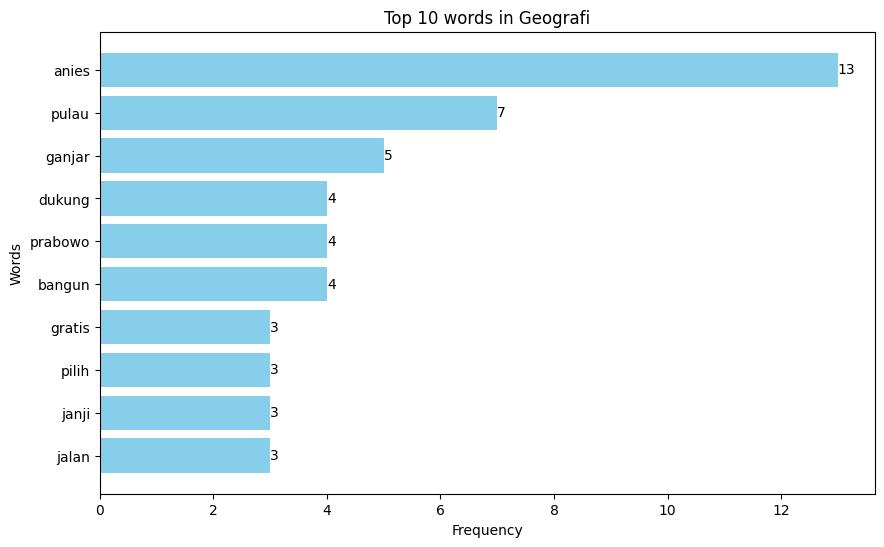

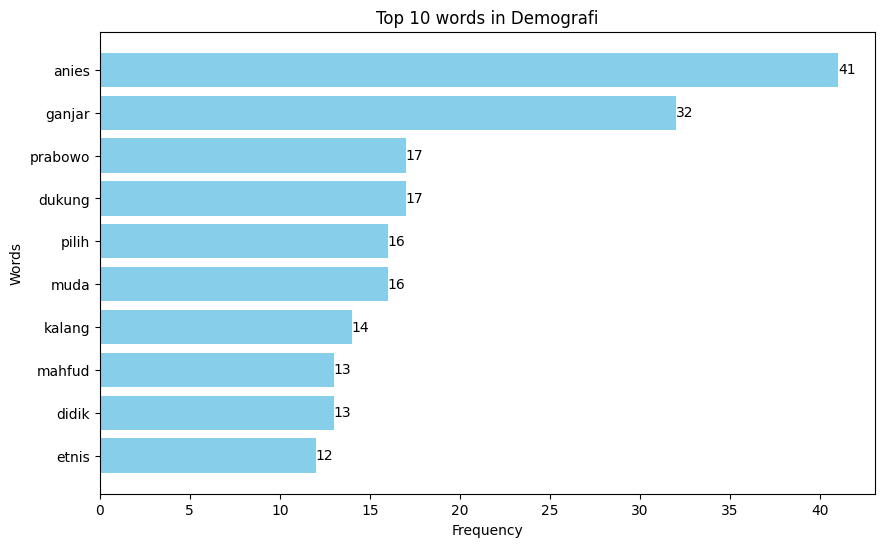

In [ ]:
# Fungsi untuk membuat bar chart dengan label per bar
def plot_top_words(word_freq_df, label):
    top_words = word_freq_df.head(10)
    plt.figure(figsize=(10, 6))
    bars = plt.barh(top_words['Word'], top_words['Frequency'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top 10 words in {label}')

    # Tambahkan label frekuensi pada setiap bar
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}',
                 va='center', ha='left', fontsize=10, color='black')

    plt.show()

# Plot bar chart untuk 'Geografi' dan 'Demografi'
plot_top_words(geografi_word_freq_df, 'Geografi')
plot_top_words(demografi_word_freq_df, 'Demografi')

# Corpus Lexicon Additional

In [ ]:
# for sentence in train[train['label'] == "Demografi"]["clean_text_3"]:
#   print(sentence)

len(train[train['label'] == "Demografi"]["clean_text_3"])

61

In [ ]:
# for sentence in train[train['label'] == "Geografi"]["clean_text_3"]:
#   print(sentence)

len(train[train['label'] == "Geografi"]["clean_text_3"])

20

# Text Augmentasi

In [ ]:
# !pip install googletrans==4.0.0-rc1 nlpaug deep_translator

1. **Translator:** Kami menggunakan `googletrans` untuk menerjemahkan teks dari bahasa Indonesia ke bahasa Inggris.
2. **Augmenter:** Kami menggunakan `nlpaug` untuk melakukan berbagai jenis augmentasi pada teks yang telah diterjemahkan.
    - `SynonymAug`: Mengganti kata dengan sinonimnya.
    - `RandomWordAug (insert)`: Menyisipkan kata secara acak.
    - `RandomWordAug (delete)`: Menghapus kata secara acak.
    - `RandomWordAug (swap)`: Menukar posisi kata secara acak.

Hasil akhirnya adalah dataframe `df` yang berisi kolom:
- `original_text`: Teks asli dalam bahasa Indonesia.
- `translated_text`: Teks yang telah diterjemahkan ke bahasa Inggris.
- `aug_synonym`, `aug_insert`, `aug_delete`, `aug_swap`: Teks yang telah mengalami berbagai jenis augmentasi.

Pastikan bahwa Anda menjalankan kode ini dalam lingkungan yang terhubung ke internet karena terjemahan memerlukan koneksi internet.

In [ ]:
import pandas as pd
from googletrans import Translator
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.sentence as nas

In [ ]:
# Inisialisasi Translator
translator = Translator()

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_text(text, src='id', dest='en'):
    translated = translator.translate(text, src=src, dest=dest)
    return translated.text

# Fungsi untuk melakukan augmentasi teks
def augment_text(text):
    # Synonym Augmenter
    aug_synonym = naw.SynonymAug(aug_src='wordnet')
    augmented_synonym = aug_synonym.augment(text)

    # Contextual Word Embeddings Augmenter (substitute)
    aug_contextual = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="substitute")
    augmented_contextual = aug_contextual.augment(text)

    # Random Deletion Augmenter
    aug_delete = naw.RandomWordAug(action="delete")
    augmented_delete = aug_delete.augment(text)

    # Random Swap Augmenter
    aug_swap = naw.RandomWordAug(action="swap")
    augmented_swap = aug_swap.augment(text)

    return augmented_synonym, augmented_contextual, augmented_delete, augmented_swap

In [ ]:
trainPakai = train[["clean_text_5", "label"]]
trainPakai = trainPakai.dropna() # 7 nan setelah di processing

In [ ]:
demografi = trainPakai[trainPakai["label"] == "Demografi"]

In [ ]:
geografi = trainPakai[trainPakai["label"] == "Geografi"]

## Demografi

In [ ]:
# Tambahkan kolom teks terjemahan
demografi['translated_text'] = demografi['clean_text_5'].apply(translate_text)

# Tambahkan kolom teks augmentasi
demografi['aug_synonym'], demografi['aug_contextual'], demografi['aug_delete'], demografi['aug_swap'] = zip(*demografi['translated_text'].apply(augment_text))

In [ ]:
# Fungsi untuk menghilangkan tanda kurung siku dan menggabungkan list menjadi string
def remove_brackets(text):
    if isinstance(text, list):
        text = ' '.join(text)
    return text.strip("[]")

# Menghilangkan tanda kurung siku dari kolom yang diinginkan
demografi['aug_synonym'] = demografi['aug_synonym'].apply(remove_brackets)
demografi['aug_contextual'] = demografi['aug_contextual'].apply(remove_brackets)
demografi['aug_delete'] = demografi['aug_delete'].apply(remove_brackets)
demografi['aug_swap'] = demografi['aug_swap'].apply(remove_brackets)

In [ ]:
from deep_translator import GoogleTranslator

# Fungsi untuk menerjemahkan teks
def translate_text(text, source_lang='en', target_lang='id'):
    return GoogleTranslator(source=source_lang, target=target_lang).translate(text)

# Menerjemahkan kolom
demografi['ID_translated_text'] = demografi['translated_text'].apply(lambda x: translate_text(x))
demografi['ID_aug_synonym'] = demografi['aug_synonym'].apply(lambda x: translate_text(x))
demografi['ID_aug_contextual'] = demografi['aug_contextual'].apply(lambda x: translate_text(x))
demografi['ID_aug_delete'] = demografi['aug_delete'].apply(lambda x: translate_text(x))
demografi['ID_aug_swap'] = demografi['aug_swap'].apply(lambda x: translate_text(x))

## Geografi

In [ ]:
# Tambahkan kolom teks terjemahan
geografi['translated_text'] = geografi['clean_text_5'].apply(translate_text)

# Tambahkan kolom teks augmentasi
geografi['aug_synonym'], geografi['aug_contextual'], geografi['aug_delete'], geografi['aug_swap'] = zip(*geografi['translated_text'].apply(augment_text))

# Fungsi untuk menghilangkan tanda kurung siku dan menggabungkan list menjadi string
def remove_brackets(text):
    if isinstance(text, list):
        text = ' '.join(text)
    return text.strip("[]")

# Menghilangkan tanda kurung siku dari kolom yang diinginkan
geografi['aug_synonym'] = geografi['aug_synonym'].apply(remove_brackets)
geografi['aug_contextual'] = geografi['aug_contextual'].apply(remove_brackets)
geografi['aug_delete'] = geografi['aug_delete'].apply(remove_brackets)
geografi['aug_swap'] = geografi['aug_swap'].apply(remove_brackets)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 964.6 kB/s eta 0:00:00


In [ ]:
# Menerjemahkan kolom
geografi['ID_translated_text'] = geografi['translated_text'].apply(lambda x: translate_text(x))
geografi['ID_aug_synonym'] = geografi['aug_synonym'].apply(lambda x: translate_text(x))
geografi['ID_aug_contextual'] = geografi['aug_contextual'].apply(lambda x: translate_text(x))
geografi['ID_aug_delete'] = geografi['aug_delete'].apply(lambda x: translate_text(x))
geografi['ID_aug_swap'] = geografi['aug_swap'].apply(lambda x: translate_text(x))

## Saving Augmentasi

In [ ]:
geografi.to_excel(cleanDataPath + "/geografi_augmentasi.xlsx")

In [ ]:
demografi.to_excel(cleanDataPath + "/demografi_augmentasi.xlsx")

## Merge to Data Pakai

In [ ]:
# Filter DataFrame
demografi_filtered = demografi[demografi['label'] == 'Demografi']

# Extract relevant columns
columns_to_concat = ["ID_translated_text", "ID_aug_synonym", "ID_aug_contextual", "ID_aug_delete", "ID_aug_swap"]
demografi_dfs_to_concat = [demografi_filtered[['label', 'clean_text_5']], *[demografi_filtered[['label', col]].rename(columns={col: 'clean_text_5'}) for col in columns_to_concat]]

# Concatenate DataFrames
demografi_augmented = pd.concat(demografi_dfs_to_concat, ignore_index=True)

In [ ]:
# Filter DataFrame
geografi_filtered = geografi[geografi['label'] == 'Geografi']

# Extract relevant columns
columns_to_concat = ["ID_translated_text", "ID_aug_synonym", "ID_aug_contextual", "ID_aug_delete", "ID_aug_swap"]
geografi_dfs_to_concat = [geografi_filtered[['label', 'clean_text_5']], *[geografi_filtered[['label', col]].rename(columns={col: 'clean_text_5'}) for col in columns_to_concat]]

# Concatenate DataFrames
geografi_augmented = pd.concat(geografi_dfs_to_concat, ignore_index=True)

In [ ]:
demografi_augmented.to_excel(cleanDataPath + "/final_demografi_augmentasi.xlsx")
geografi_augmented.to_excel(cleanDataPath + "/final_geografi_augmentasi.xlsx")

# Insert Augmentasi Into Train Data

In [ ]:
train = pd.read_csv(cleanDataPath + "/Processing-Data-clean-text-5.csv")

In [ ]:
demografi_augmented_df = pd.read_excel(cleanDataPath + "/final_demografi_augmentasi.xlsx").drop(columns = "Unnamed: 0")
geografi_augmented_df = pd.read_excel(cleanDataPath + "/final_geografi_augmentasi.xlsx").drop(columns = "Unnamed: 0")

In [ ]:
data_pakai = train[["label", "clean_text_5"]].dropna()

In [ ]:
# Concatenate the DataFrames
balanced_df = pd.concat([data_pakai, demografi_augmented_df, geografi_augmented_df], ignore_index=True)

In [ ]:
balanced_df['clean_text_5'] = balanced_df['clean_text_5'].str.lower()

In [ ]:
balanced_df.to_excel(cleanDataPath + "/balanced train.xlsx")